              county    state code  cases  deaths   intDate
date                                                       
2020-03-11  Sheridan  Wyoming   WY      1     0.0  20200311
2020-03-12  Sheridan  Wyoming   WY      1     0.0  20200312
2020-03-13   Fremont  Wyoming   WY      1     0.0  20200313
2020-03-13  Sheridan  Wyoming   WY      1     0.0  20200313
2020-03-14   Fremont  Wyoming   WY      1     0.0  20200314


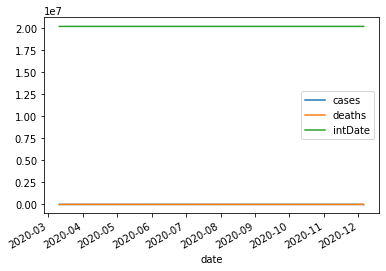

In [36]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
 
series = read_csv('WY_all_states.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

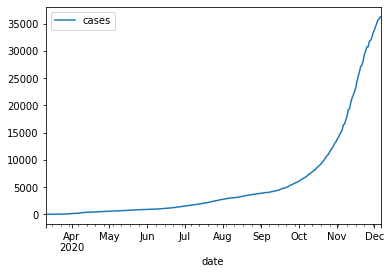

In [67]:
new_series=series[['cases']]
latest_series=new_series.groupby(['date']).sum()
latest_series.plot()

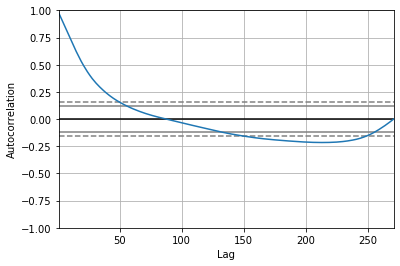

In [68]:
autocorrelation_plot(latest_series)
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.cases   No. Observations:                  270
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1669.600
Method:                       css-mle   S.D. of innovations            116.702
Date:                Wed, 09 Dec 2020   AIC                           3353.201
Time:                        16:35:32   BIC                           3378.390
Sample:                    03-12-2020   HQIC                          3363.316
                         - 12-06-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           168.9551    145.500      1.161      0.246    -116.220     454.131
ar.L1.D.cases    -0.1500      0.061     -2.479      0.013      -0.269      -0.031
ar.L2.D.cases     0.2744      0.058     

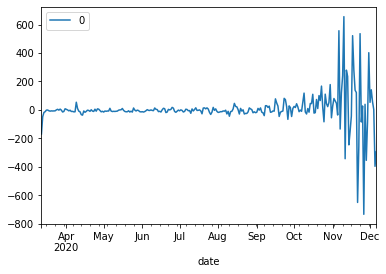

                0
count  270.000000
mean     3.696859
std    117.233062
min   -733.874597
25%    -13.307493
50%     -4.252549
75%     11.220687
max    655.563107


In [69]:
model = ARIMA(latest_series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
print(residuals.describe())

In [60]:
# predict_2020 = model.predict(latest_series)

# results_df = pd.DataFrame(latest_series)
# results_df['predicted'] = model.predict(predict_2020)

regression: R2 (.score()), MSE
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

(lower the better)

In [65]:
import numpy as np
np.average(residuals ** 2)

13222.871028321724